# MLP using Automatic Differentiation

***
**Name**: __Poorwa Hirve__
***

## Goal

The goal of this assignment is to build 1 layer MLP network using the framework that you built in **Assignment 3**.

In [1]:
from tensor import Tensor
import numpy as np
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

### 1. Implementing the model

In [2]:
class MLP(object):
    def __init__(self, n_in, n_hid, n_out):
        """
        Initialize Layers (hidden and output) of the network.
        Note: Tensors are used here instead of ndarrays, operations
        on tensors such as dot, add, subtract, pow will allow us
        to keep track of the computational graph, thereby making
        gradient computation easier using a simple call to the 
        loss (MSE in this case).
        
        params:
        n_in (int): Number of input neurons.
        n_hid (int): Number of neurons in hidden layer.
        n_out (int): Number of neurons in output layer. 
        """

        self.l1 = Tensor(np.random.randn(n_in, n_hid))
        self.l2 = Tensor(np.random.randn(n_hid, n_out))

    def forward(self, X):
        """
        Implement the forward pass.

        params:
        X (NxM Tensor):
            M dimensional input to be feed forward to the network.

        returns:

        y_hat (1xN Tensor): activations of the output layer.
        """
        # TO-DO
        # Obtain final layer activations using tensors.
        # Unlike Assignment 3, you do not need to hold intermediate
        # values here as the AD architecture will build the computational
        # graph you.
        
#         X = Tensor(X)

        z1 = (X.dot(self.l1)).relu()
        z2 = (z1.dot(self.l2)).relu()
        
        return z2
        
    def update(self, step_size):
        """
        Implement the update rule for network weights and biases.

        return:

        none.
        """
        
        # TO-DO
        self.l1.value = self.l1.value - step_size * self.l1.grad
        self.l2.value = self.l2.value - step_size * self.l2.grad
        
    def zero_grad(self):
        """
        Resets gradients for each layer defined in
        the constructor.
        """
        # TO-DO
        self.l1.zero_grad()
        self.l2.zero_grad()

### 2. Train the model 

In [3]:
def train(model, X, y, epochs, lr, batch_size):
    """
    Implement the train loop.
    Make sure gradients are reset after each call to forward.
    
    params:
    model (MLP): 1-hidden-layer MLP model to be trained.
    X (Nx5 ndarray): Training inputs.
    y (Nx1 ndarray): Groundtruth labels.
    epochs (int): number of epochs for training
    lr (float32): Learning-rate/Step-size for gradient descent. 
    
    returns:
    Implementation choice.
    """
    # TO-DO
    # For each mini batch, do the following:
    # 1. Obtain predictions using forward().
    # 2. Compute MSE loss.
    # 3. Accumulate layer gradients using the backward call
    #    on loss.
    # 4. update() layer weights using gradient descent.
    #   NOTE: you do not need to maintain computational
    #
    
    epoch_list = []
    
    batches = int(X.shape[0] / batch_size)
    for i in range(epochs):
        X, y = shuffle(X, y)
        batch_error = []
        
        for j in range(0, X.shape[0], batch_size):
            y_hat = model.forward(Tensor(X[j:j+batch_size]))
            model.zero_grad()
            y_actual = Tensor(y[j:j+batch_size])
            
            error = (y_hat - y_actual).pow(2).mean()
            batch_error.append(error.value)
            error.backward()
            
            model.update(lr)
            
        epoch_list.append(sum(batch_error) / batches)
        
    return epoch_list

### 3. Experiment
***

**Part 3.A**  

Create a model with $I = 5$ inputs, $H = 100$ and $O = 1$ output neuron. Train the model for 100 epochs using the dataset below. Plot the MSE loss for each epoch. You do not need to threshold/binarize the outputs.

In [4]:
# Do-not modify this.
# Load dataset.
X, y = np.load("data/X.npy"), np.load("data/y.npy")

In [5]:
# Part 3.A
mlp = MLP(5, 100, 1)
epoch_list = train(mlp, X, y, 100, 5e-6, 10)

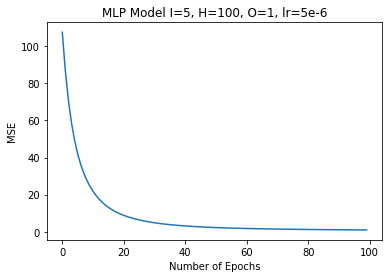

In [6]:
x = range(len(epoch_list))
plt.plot(x, epoch_list)
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.title('MLP Model I=5, H=100, O=1, lr=5e-6')
plt.show()


**Part 3.B**

Modify the `train()` to `train_decay()` such that learning rate decays after a condition has been met. For example: 
1. If running loss stays with a limit for 'e' number of epochs.
2. Or a constant weight decay after 'e' number of epochs.

Plot MSE loss for **3.A and 3.B** on the same graph.

In [7]:
def train_decay(model, X, y, epochs, lr, decay, batch_size):
    epoch_list = []
    
    batches = int(X.shape[0] / batch_size)
    epoch_count = 0
    for i in range(epochs):
        X, y = shuffle(X, y)
        batch_error = []
        
        for j in range(0, X.shape[0], batch_size):
            y_hat = model.forward(Tensor(X[j:j+batch_size]))
            model.zero_grad()
            y_actual = Tensor(y[j:j+batch_size])
            
            error = (y_hat - y_actual).pow(2).mean()
            batch_error.append(error.value)
            error.backward()
            
            model.update(lr)
            
        epoch_list.append(sum(batch_error) / batches)
        
        # Decay condition: Every 5 epochs, if change in current error and old error <= 5 %, divide lr by decay factor
        if (i+1) % 5 == 0:
            if abs(epoch_list[-1] - epoch_list[-2]) / 100 <= 5:
                lr /= decay
        
    return epoch_list

In [8]:
mlp_decay = MLP(5, 100, 1)
epoch_list_decay = train_decay(mlp_decay, X, y, 100, 5e-6, 1.25, 10)

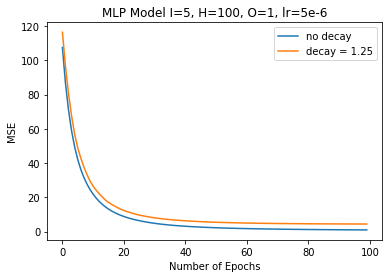

In [9]:
plt.plot(x, epoch_list, label="no decay")
plt.plot(x, epoch_list_decay, label="decay = 1.25")
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.title('MLP Model I=5, H=100, O=1, lr=5e-6')
plt.legend()
plt.show()